<a href="https://colab.research.google.com/github/ManojSinghBisht31072004/Deep-L/blob/main/Object__Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [10]:
%cd  /content/drive/MyDrive/Colab Notebooks/Deep learning Lab

/content/drive/MyDrive/Colab Notebooks/Deep learning Lab


In [11]:
# Loading the YOLO Model
print("LOADING YOLO")
net = cv2.dnn.readNet("yolov3.weights", "yolov3 (1).cfg")
print("YOLO LOADED")

LOADING YOLO
YOLO LOADED


In [12]:
# Loading COCO Class Names
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [13]:
# Getting Layer Names of the Network
layer_names = net.getLayerNames()


In [14]:
# Determine the output layer names from the YOLO model
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")

YOLO LOADED


Input Image:


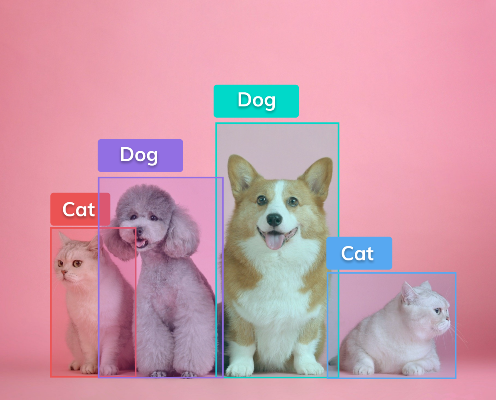

In [25]:
# Reading and Preprocessing the Image
img = cv2.imread("obj_det_sample(1).png")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
print("Input Image:")
cv2_imshow(img)

In [26]:
# Blob Creation and Preprocessing
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)


In [27]:
# Object Detection
net.setInput(blob)
outs = net.forward(output_layers)

In [28]:
# Processing YOLO Outputs
class_ids = []
confidences = []
boxes = []

In [29]:
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.3:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [30]:
# Non-Maximum Suppression (NMS)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [31]:
# Drawing Bounding Boxes and Labels
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [32]:
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]

        # Draw the bounding box
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Draw the label
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        print(f"Detected object: {label}, confidence: {confidences[i]}, box: ({x}, {y}, {w}, {h})")


Detected object: dog, confidence: 0.9977182745933533, box: (218, 155, 121, 218)
Detected object: dog, confidence: 0.7642538547515869, box: (107, 184, 107, 192)
Detected object: cat, confidence: 0.936845600605011, box: (345, 277, 103, 101)
Detected object: cat, confidence: 0.9185462594032288, box: (52, 226, 55, 148)


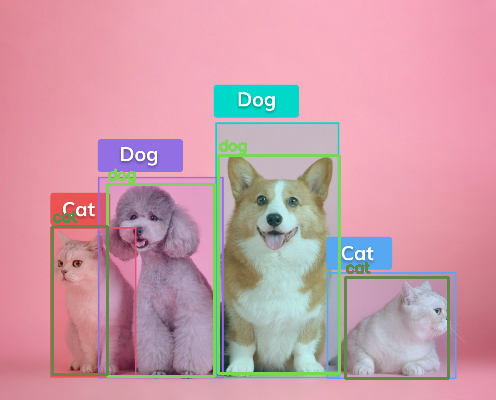

-1

In [33]:
# Displaying the Result
cv2_imshow(img)
cv2.waitKey(0)